--- FIFA Rating Prediction ---
R²: 0.158
RMSE: 4.864

--- Real-Life Rating Prediction ---
R²: 0.581
RMSE: 0.185



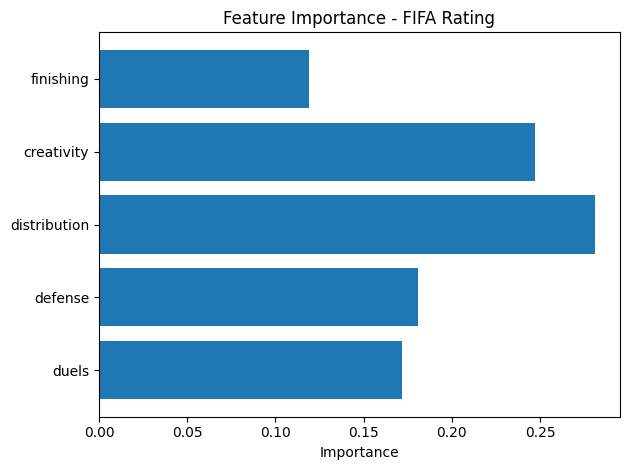

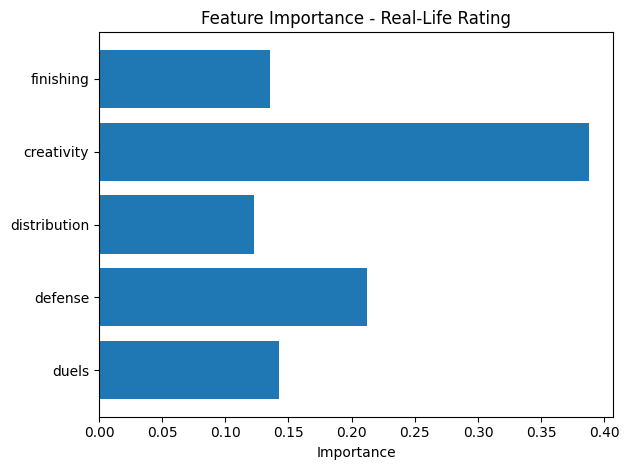

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# --- Constants ---
FEATURE_COLS = ['finishing', 'creativity', 'distribution', 'defense', 'duels']
TARGET_FIFA = 'Fifa Ability Overall'  
TARGET_REAL = 'Rating'                

df_weighted_dict = pd.read_excel('General_Weighted_Features.xlsx', sheet_name=None)
df_weighted = df_weighted_dict['Sheet1']  # Use the correct sheet name if different

# --- Split Data ---
X = df_weighted[FEATURE_COLS]
y_fifa = df_weighted[TARGET_FIFA]
y_real = df_weighted[TARGET_REAL]

X_train, X_test, y_fifa_train, y_fifa_test = train_test_split(X, y_fifa, test_size=0.2, random_state=42)
_, _, y_real_train, y_real_test = train_test_split(X, y_real, test_size=0.2, random_state=42)

# --- Train Models ---
fifa_model = RandomForestRegressor(random_state=42)
fifa_model.fit(X_train, y_fifa_train)
fifa_preds = fifa_model.predict(X_test)

real_model = RandomForestRegressor(random_state=42)
real_model.fit(X_train, y_real_train)
real_preds = real_model.predict(X_test)

# --- Evaluation ---
import numpy as np

def print_scores(y_true, y_pred, label):
    print(f"--- {label} ---")
    print("R²:", round(r2_score(y_true, y_pred), 3))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))
    print()

print_scores(y_fifa_test, fifa_preds, "FIFA Rating Prediction")
print_scores(y_real_test, real_preds, "Real-Life Rating Prediction")

# --- Feature Importance (Optional Plot) ---
def plot_importance(model, feature_names, title):
    importances = model.feature_importances_
    plt.barh(feature_names, importances)
    plt.title(title)
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_importance(fifa_model, FEATURE_COLS, "Feature Importance - FIFA Rating")
plot_importance(real_model, FEATURE_COLS, "Feature Importance - Real-Life Rating")


In [2]:
## Residual Analysis
# --- Residual Analysis ---

# Add predictions back to DataFrame
df_weighted['fifa_pred'] = fifa_model.predict(X)
df_weighted['real_pred'] = real_model.predict(X)

# Residuals = Actual - Predicted
df_weighted['fifa_residual'] = df_weighted[TARGET_FIFA] - df_weighted['fifa_pred']
df_weighted['real_residual'] = df_weighted[TARGET_REAL] - df_weighted['real_pred']

# Sort by FIFA residuals to find overrated and underrated players
# Assumes you have a 'player_name' or similar identifier column
if 'player_name' in df_weighted.columns:
    print("\nTop 10 Overrated Players by FIFA:")
    overrated = df_weighted.sort_values('fifa_residual', ascending=False).head(10)
    print(overrated[['player_name', TARGET_FIFA, 'fifa_pred', 'fifa_residual']])

    print("\nTop 10 Underrated Players by FIFA:")
    underrated = df_weighted.sort_values('fifa_residual').head(10)
    print(underrated[['player_name', TARGET_FIFA, 'fifa_pred', 'fifa_residual']])
else:
    print("Note: 'player_name' column not found — residual summary skipped.")


Note: 'player_name' column not found — residual summary skipped.


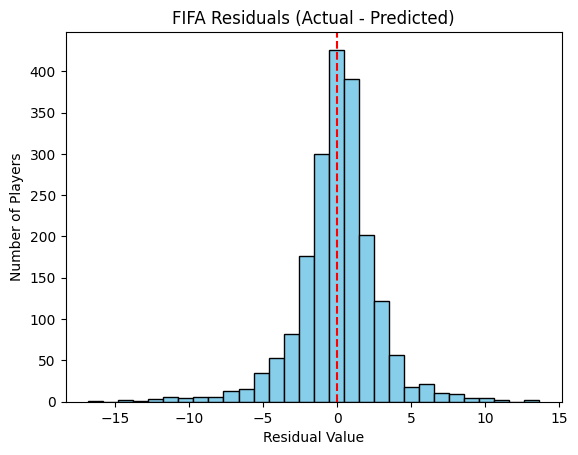

In [3]:
plt.hist(df_weighted['fifa_residual'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title('FIFA Residuals (Actual - Predicted)')
plt.xlabel('Residual Value')
plt.ylabel('Number of Players')
plt.show()
